In [1]:
pip install pydub


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import numpy as np

import json
import pandas as pd
from tqdm import tqdm
import os

import IPython.display
import sklearn.preprocessing
from sklearn.model_selection import train_test_split 
import librosa
import pydub
import pickle as pickle
import librosa.display
import sklearn.preprocessing 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout,Flatten, Conv2D, MaxPooling2D,LSTM, TimeDistributed, Convolution1D, MaxPooling1D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import Callback

import tensorflow as tf
from tensorflow.keras import backend as K
import keras





In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
wav_path = "/content/drive/My Drive/accentdata"
wav_filenames = os.listdir(wav_path)
ex_wav_filenames = wav_filenames[0]
ex_wav_filenames
eg_wave, eg_sr = librosa.load(wav_path + "/" +ex_wav_filenames, mono=True )

In [5]:
file_name_mfcc = []
for filename in tqdm(wav_filenames):
  wave, sr = librosa.load(wav_path+ "/" +filename, mono = True)
  mfcc = librosa.feature.mfcc(y=wave, sr = sr)
  file_name_mfcc.append([filename, wave, mfcc, sr])




100%|██████████| 662/662 [02:23<00:00,  4.61it/s]


In [6]:
data = pd.DataFrame(data = file_name_mfcc, columns = ["filename", "wav", "mfcc", "sr"])

In [7]:
data

,filename,wav,mfcc,sr
0,igbo91.wav,"[0.12788561, 0.16963689, 0.054908704, -0.04077...","[[-107.81684, -123.302864, -150.63849, -156.15...",22050
1,igbo102.wav,"[0.026923971, 0.036769062, -0.00013287933, -0....","[[-279.8276, -235.11525, -179.63089, -143.5203...",22050
2,yoruba250.wav,"[0.018155307, 0.026333354, 0.019969577, 0.0206...","[[-392.26627, -306.9462, -226.50438, -187.9869...",22050
3,yoruba361.wav,"[0.058746487, 0.0874564, 0.06950038, 0.0669236...","[[-272.15494, -262.68542, -276.19376, -243.048...",22050
4,yoruba98.wav,"[0.043925084, 0.057802264, 0.018163802, -0.010...","[[-245.23903, -261.71207, -282.54337, -273.279...",22050
...,...,...,...,...
657,yoruba363.wav,"[-0.13565159, -0.028213754, 0.18824653, -0.022...","[[-388.35233, -409.13602, -462.55835, -493.872...",22050
658,yoruba303.wav,"[-0.025613483, -0.04062547, -0.037113406, -0.0...","[[-309.43918, -259.55664, -235.32463, -229.364...",22050
659,yoruba34.wav,"[-0.02364207, 0.015536387, 0.0052080136, -0.00...","[[-317.34106, -287.14655, -252.37566, -220.180...",22050
660,igbo12.wav,"[0.038635306, 0.024735818, -0.045139037, -0.02...","[[-333.15192, -229.69794, -148.22176, -122.209...",22050


In [8]:
data = data[["filename", "mfcc", "sr"]]

In [9]:
data


,filename,mfcc,sr
0,igbo91.wav,"[[-107.81684, -123.302864, -150.63849, -156.15...",22050
1,igbo102.wav,"[[-279.8276, -235.11525, -179.63089, -143.5203...",22050
2,yoruba250.wav,"[[-392.26627, -306.9462, -226.50438, -187.9869...",22050
3,yoruba361.wav,"[[-272.15494, -262.68542, -276.19376, -243.048...",22050
4,yoruba98.wav,"[[-245.23903, -261.71207, -282.54337, -273.279...",22050
...,...,...,...
657,yoruba363.wav,"[[-388.35233, -409.13602, -462.55835, -493.872...",22050
658,yoruba303.wav,"[[-309.43918, -259.55664, -235.32463, -229.364...",22050
659,yoruba34.wav,"[[-317.34106, -287.14655, -252.37566, -220.180...",22050
660,igbo12.wav,"[[-333.15192, -229.69794, -148.22176, -122.209...",22050


In [29]:
data = data.sort_values(by= "filename")

In [30]:
data

,filename,mfcc,sr,padded_mfcc
351,hausa1.wav,"[[-146.01768, -153.39105, -210.3232, -242.0239...",22050,"[[-146.01768, -153.39105, -210.3232, -242.0239..."
121,hausa10.wav,"[[-266.99124, -216.79352, -154.13614, -125.313...",22050,"[[-266.99124, -216.79352, -154.13614, -125.313..."
545,hausa11.wav,"[[-403.10678, -398.43338, -292.63303, -202.575...",22050,"[[-403.10678, -398.43338, -292.63303, -202.575..."
486,hausa12.wav,"[[-427.7325, -421.71292, -389.26068, -342.0095...",22050,"[[-427.7325, -421.71292, -389.26068, -342.0095..."
612,hausa13.wav,"[[-142.56625, -116.10384, -96.849174, -91.2646...",22050,"[[-142.56625, -116.10384, -96.849174, -91.2646..."
...,...,...,...,...
566,yoruba95.wav,"[[-376.32935, -385.9099, -411.8818, -432.94998...",22050,"[[-376.32935, -385.9099, -411.8818, -432.94998..."
452,yoruba96.wav,"[[-189.76833, -158.44206, -149.4194, -149.6400...",22050,"[[-189.76833, -158.44206, -149.4194, -149.6400..."
97,yoruba97.wav,"[[-261.9663, -255.17252, -238.89098, -165.0040...",22050,"[[-261.9663, -255.17252, -238.89098, -165.0040..."
4,yoruba98.wav,"[[-245.23903, -261.71207, -282.54337, -273.279...",22050,"[[-245.23903, -261.71207, -282.54337, -273.279..."


AttributeError: ignored

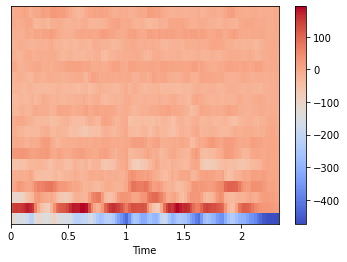

In [31]:
librosa.display.specshow(data["mfcc"][0], x_axis = "time")
plt.colorbar()
plt.tight.layout()
plt.title("mfcc")
plt.show

AttributeError: ignored

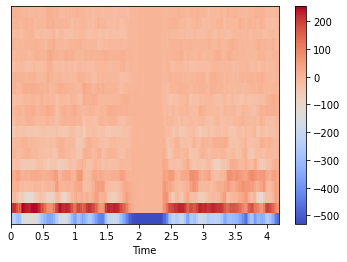

In [32]:
librosa.display.specshow(data["mfcc"][189], x_axis = "time")
plt.colorbar()
plt.tight.layout()
plt.title("mfcc")
plt.show

In [33]:
data["native_language"] = data["filename"].str[:-4]

In [34]:
data

,filename,mfcc,sr,padded_mfcc,native_language
351,hausa1.wav,"[[-146.01768, -153.39105, -210.3232, -242.0239...",22050,"[[-146.01768, -153.39105, -210.3232, -242.0239...",hausa1
121,hausa10.wav,"[[-266.99124, -216.79352, -154.13614, -125.313...",22050,"[[-266.99124, -216.79352, -154.13614, -125.313...",hausa10
545,hausa11.wav,"[[-403.10678, -398.43338, -292.63303, -202.575...",22050,"[[-403.10678, -398.43338, -292.63303, -202.575...",hausa11
486,hausa12.wav,"[[-427.7325, -421.71292, -389.26068, -342.0095...",22050,"[[-427.7325, -421.71292, -389.26068, -342.0095...",hausa12
612,hausa13.wav,"[[-142.56625, -116.10384, -96.849174, -91.2646...",22050,"[[-142.56625, -116.10384, -96.849174, -91.2646...",hausa13
...,...,...,...,...,...
566,yoruba95.wav,"[[-376.32935, -385.9099, -411.8818, -432.94998...",22050,"[[-376.32935, -385.9099, -411.8818, -432.94998...",yoruba95
452,yoruba96.wav,"[[-189.76833, -158.44206, -149.4194, -149.6400...",22050,"[[-189.76833, -158.44206, -149.4194, -149.6400...",yoruba96
97,yoruba97.wav,"[[-261.9663, -255.17252, -238.89098, -165.0040...",22050,"[[-261.9663, -255.17252, -238.89098, -165.0040...",yoruba97
4,yoruba98.wav,"[[-245.23903, -261.71207, -282.54337, -273.279...",22050,"[[-245.23903, -261.71207, -282.54337, -273.279...",yoruba98


In [35]:
data["native_language"] = data.apply(lambda x: "".join([i for i in x["native_language"] if not i.isdigit()]), axis = 1)

In [36]:
data

,filename,mfcc,sr,padded_mfcc,native_language
351,hausa1.wav,"[[-146.01768, -153.39105, -210.3232, -242.0239...",22050,"[[-146.01768, -153.39105, -210.3232, -242.0239...",hausa
121,hausa10.wav,"[[-266.99124, -216.79352, -154.13614, -125.313...",22050,"[[-266.99124, -216.79352, -154.13614, -125.313...",hausa
545,hausa11.wav,"[[-403.10678, -398.43338, -292.63303, -202.575...",22050,"[[-403.10678, -398.43338, -292.63303, -202.575...",hausa
486,hausa12.wav,"[[-427.7325, -421.71292, -389.26068, -342.0095...",22050,"[[-427.7325, -421.71292, -389.26068, -342.0095...",hausa
612,hausa13.wav,"[[-142.56625, -116.10384, -96.849174, -91.2646...",22050,"[[-142.56625, -116.10384, -96.849174, -91.2646...",hausa
...,...,...,...,...,...
566,yoruba95.wav,"[[-376.32935, -385.9099, -411.8818, -432.94998...",22050,"[[-376.32935, -385.9099, -411.8818, -432.94998...",yoruba
452,yoruba96.wav,"[[-189.76833, -158.44206, -149.4194, -149.6400...",22050,"[[-189.76833, -158.44206, -149.4194, -149.6400...",yoruba
97,yoruba97.wav,"[[-261.9663, -255.17252, -238.89098, -165.0040...",22050,"[[-261.9663, -255.17252, -238.89098, -165.0040...",yoruba
4,yoruba98.wav,"[[-245.23903, -261.71207, -282.54337, -273.279...",22050,"[[-245.23903, -261.71207, -282.54337, -273.279...",yoruba


In [37]:
data["flag"] = data['native_language'].replace(['hausa', 'igbo', 'yoruba'],
                        [0, 1, 2])

In [38]:
# data["flag"] = keras.utils.np_utils.to_categorical(data["flag"])

In [39]:
data["flag"]

351    0
121    0
545    0
486    0
612    0
      ..
566    2
452    2
97     2
4      2
118    2
Name: flag, Length: 662, dtype: int64

In [40]:
data[0:150]

,filename,mfcc,sr,padded_mfcc,native_language,flag
351,hausa1.wav,"[[-146.01768, -153.39105, -210.3232, -242.0239...",22050,"[[-146.01768, -153.39105, -210.3232, -242.0239...",hausa,0
121,hausa10.wav,"[[-266.99124, -216.79352, -154.13614, -125.313...",22050,"[[-266.99124, -216.79352, -154.13614, -125.313...",hausa,0
545,hausa11.wav,"[[-403.10678, -398.43338, -292.63303, -202.575...",22050,"[[-403.10678, -398.43338, -292.63303, -202.575...",hausa,0
486,hausa12.wav,"[[-427.7325, -421.71292, -389.26068, -342.0095...",22050,"[[-427.7325, -421.71292, -389.26068, -342.0095...",hausa,0
612,hausa13.wav,"[[-142.56625, -116.10384, -96.849174, -91.2646...",22050,"[[-142.56625, -116.10384, -96.849174, -91.2646...",hausa,0
...,...,...,...,...,...,...
151,igbo66.wav,"[[-323.22736, -345.23242, -395.4946, -403.0901...",22050,"[[-323.22736, -345.23242, -395.4946, -403.0901...",igbo,1
364,igbo67.wav,"[[-214.762, -204.7917, -213.01703, -253.72974,...",22050,"[[-214.762, -204.7917, -213.01703, -253.72974,...",igbo,1
536,igbo68.wav,"[[-216.04024, -185.62881, -161.64116, -180.334...",22050,"[[-216.04024, -185.62881, -161.64116, -180.334...",igbo,1
579,igbo69.wav,"[[-369.1259, -404.56317, -488.12302, -503.3538...",22050,"[[-369.1259, -404.56317, -488.12302, -503.3538...",igbo,1


In [41]:
MFCC_MAX_LEN = 0
for arr in data["mfcc"]:
  if arr.shape[1] > MFCC_MAX_LEN:
    MFCC_MAX_LEN = arr.shape[1]
    
MFCC_MAX_LEN

402

In [42]:
MFCC_NUM = 0
for arr in data["mfcc"]:
  if arr.shape[0] > MFCC_NUM:
      MFCC_NUM = arr.shape[0]
    
MFCC_NUM

20

In [43]:
def resize_mfcc(df,MFCC_MAX_LEN):
    df["padded_mfcc"] = df.apply(lambda x: librosa.util.fix_length(data = x["mfcc"],size = MFCC_MAX_LEN,axis = 1), axis = 1)
    return df
df = resize_mfcc(data,MFCC_MAX_LEN)

In [44]:
train_data, test_data = train_test_split(data, test_size = 0.1, random_state=123)

In [45]:
train_data

,filename,mfcc,sr,padded_mfcc,native_language,flag
314,yoruba310.wav,"[[-226.82556, -229.66853, -248.20644, -305.560...",22050,"[[-226.82556, -229.66853, -248.20644, -305.560...",yoruba,2
65,yoruba269.wav,"[[-236.9897, -222.53041, -217.01746, -221.9316...",22050,"[[-236.9897, -222.53041, -217.01746, -221.9316...",yoruba,2
609,igbo106.wav,"[[-258.8602, -181.0612, -112.7509, -105.639305...",22050,"[[-258.8602, -181.0612, -112.7509, -105.639305...",igbo,1
343,yoruba355.wav,"[[-384.78107, -392.45392, -277.55777, -150.598...",22050,"[[-384.78107, -392.45392, -277.55777, -150.598...",yoruba,2
594,yoruba339.wav,"[[-201.08069, -151.70679, -147.66628, -197.780...",22050,"[[-201.08069, -151.70679, -147.66628, -197.780...",yoruba,2
...,...,...,...,...,...,...
145,igbo23.wav,"[[-305.3205, -266.24927, -240.12556, -240.4971...",22050,"[[-305.3205, -266.24927, -240.12556, -240.4971...",igbo,1
134,yoruba225.wav,"[[-366.81363, -358.09326, -328.6635, -268.1331...",22050,"[[-366.81363, -358.09326, -328.6635, -268.1331...",yoruba,2
352,yoruba28.wav,"[[-375.86472, -427.545, -529.04, -546.6119, -5...",22050,"[[-375.86472, -427.545, -529.04, -546.6119, -5...",yoruba,2
40,yoruba264.wav,"[[-220.79547, -207.93242, -208.68364, -177.406...",22050,"[[-220.79547, -207.93242, -208.68364, -177.406...",yoruba,2


In [46]:
rest_data


NameError: ignored

In [ ]:
test_data

In [47]:
x_train = np.array(list(train_data["padded_mfcc"]))

x_test = np.array(list(test_data["padded_mfcc"]))

In [48]:
y_train = train_data["flag"]

y_test= test_data["flag"]

In [49]:
y_train = tf.one_hot(y_train, depth=3)

y_test = tf.one_hot(y_test, depth=3)


In [50]:
y_train

<tf.Tensor: shape=(595, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

In [51]:
feature_dim_1 = MFCC_NUM
feature_dim_2 = MFCC_MAX_LEN
channel = 1


In [53]:
x_train_reshaped = x_train.reshape(x_train.shape[0], feature_dim_1,feature_dim_2,channel)

x_test_reshaped = x_test.reshape(x_test.shape[0], feature_dim_1,feature_dim_2,channel)


In [54]:
MFCC_MAX_LEN

402

In [55]:
# model.add(LSTM(64, return_sequences=True, stateful=False,
#                batch_input_shape= (3, x_train_reshaped.shape[1], x_train_reshaped.shape[2])))
# model.add(LSTM(64, return_sequences=True, stateful=False))
# model.add(LSTM(64, stateful=False))

In [56]:
model = Sequential()
model.add(Conv2D(32, (2,2), input_shape =(feature_dim_1,feature_dim_2,channel)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.15))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('sigmoid'))






In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 19, 401, 32)       160       
                                                                 
 activation (Activation)     (None, 19, 401, 32)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 200, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 9, 200, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 199, 32)        4128      
                                                                 
 activation_1 (Activation)   (None, 8, 199, 32)        0         
                                                        

In [60]:

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = tf.keras.optimizers.Adam(lr = 0.05),metrics=["Accuracy"])
history = model.fit(x_train, y_train, batch_size =10 , epochs = 50, verbose = 1 )

Epoch 1/50
60/60 [==============================] - 1s 6ms/step - loss: 0.7516 - Accuracy: 0.7227
Epoch 2/50
60/60 [==============================] - 0s 5ms/step - loss: 0.7546 - Accuracy: 0.7227
Epoch 3/50
60/60 [==============================] - 0s 5ms/step - loss: 0.7546 - Accuracy: 0.7227
Epoch 4/50
60/60 [==============================] - 0s 5ms/step - loss: 0.7538 - Accuracy: 0.7227
Epoch 5/50
60/60 [==============================] - 0s 4ms/step - loss: 0.7540 - Accuracy: 0.7227
Epoch 6/50
60/60 [==============================] - 0s 5ms/step - loss: 0.7579 - Accuracy: 0.7227
Epoch 7/50
60/60 [==============================] - 0s 5ms/step - loss: 0.7527 - Accuracy: 0.7227
Epoch 8/50
60/60 [==============================] - 0s 5ms/step - loss: 0.7553 - Accuracy: 0.7227
Epoch 9/50
60/60 [==============================] - 0s 4ms/step - loss: 0.7532 - Accuracy: 0.7227
Epoch 10/50
60/60 [==============================] - 0s 5ms/step - loss: 0.7518 - Accuracy: 0.7227
Epoch 11/50
60/60 [

In [61]:
import sklearn
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
report = classification_report(y_test, y_pred.round())
print(report)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        14
           2       0.75      1.00      0.85        50

   micro avg       0.75      0.75      0.75        67
   macro avg       0.25      0.33      0.28        67
weighted avg       0.56      0.75      0.64        67
 samples avg       0.75      0.75      0.75        67



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
